**Генерирање на податочно множество од симулирани бранови (BBH) бранови**

Во овој код се креира template bank, односно се креира листа од примероци кои подоцна како дополнителни симулирани гравитациони бранови (примероци) за CNN мрежата. Избраните параметри за template bank - BBH сигнали се следните:


*   масата за двете црни дупки од 5 до 100 соларни маси со чекор 5
*   вредности на спинот од -0.8 до 0.8 со чекор 0.4


*   однос помеѓу масите (mass ratio) m1/m2 <= 10






In [1]:
! pip install -q 'lalsuite==7.11' 'PyCBC==2.0.5'

In [2]:
import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.catalog
from pycbc.types import TimeSeries
import numpy as np
import pandas as pd
import os

In [3]:
# primerocite kje se generiraat vo nekolku krugovi zemajkji po edna masa za primarnata crna dupka i site mozhni kombinacii za sekundarnata crna dupka i spinovite na dvete tela
templates_BBH_5 = []

In [4]:
BH_masses_BBH = []

start_mass = 5
end_mass = 100

step = 5

current_mass = start_mass
while current_mass <= end_mass:
    BH_masses_BBH.append(current_mass)
    current_mass += step

In [21]:
print(len(BH_masses_BBH))

20


In [5]:
spins = []

start_spin = -0.8
end_spin = 0.8

step = 0.4

current_spin = start_spin
while current_spin <= end_spin:
    spins.append(current_spin)
    current_spin += step

Template bank се креира со get_td_waveform функцијата за креирање на гравитациони бранови во временски домен. Функцијата ги враќа плус поларизацијата (која се однесува на алтернативните истегнувања и скусувања на гравитациониот бран како што минува низ простор-времето гледано вертикално и хоризонтално) и вкрстената поларизација (која се однесува на алтернативните истегнувања и скусувања на гравитациониот бран како што минува низ простор-времето под агол од 45 степени). Оваа функција на генерирање вклучува огромен домен на параметри, меѓу кои се масите и спиновите на двете тела, фреквенцијата на семплирање и сл.

In [6]:
from pycbc.waveform import get_td_waveform

In [7]:
m1 = BH_masses_BBH[0] # m1=5
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_5.append(waveform)

За генерирање на BBH бранови се користи апроксиматорот 'SEOBNRv3' кој е погоден за BBH системите со вклучени спин-ефекти.

In [8]:
print(len(templates_BBH_5))

250


In [9]:
print(templates_BBH_5[0].size)

246684


Треба да се намали бројот на data points на 2048 за да биде настанот 1s долг.

In [10]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_5:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_5 = modified_waveforms

In [11]:
print(len(templates_BBH_5[0]))

2048


In [12]:
ts = TimeSeries(templates_BBH_5[0], delta_t=1.0/2048)

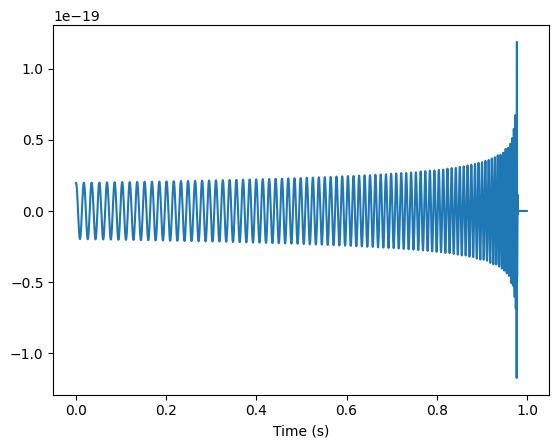

In [13]:
pylab.plot(ts.sample_times, ts)
pylab.xlabel('Time (s)')
pylab.show()

In [15]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_5 = []
event_targets_5 = []

i = 0

for waveform in templates_BBH_5:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_5.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_5.append('BBH')

  i = i+1

labels = np.array([event_paths_5, event_targets_5]).T
np.save(os.path.join(output_dir, 'labels.npy'), labels)

In [16]:
print(i)

250


In [25]:
i = 250

In [26]:
templates_BBH_10 = []

In [27]:
m1 = BH_masses_BBH[1] # m1=10
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_10.append(waveform)

In [28]:
print(len(templates_BBH_10))

475


In [29]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_10:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_10 = modified_waveforms

In [30]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_10 = []
event_targets_10 = []

for waveform in templates_BBH_10:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_10.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_10.append('BBH')

  i = i+1

labels = np.array([event_paths_10, event_targets_10]).T
np.save(os.path.join(output_dir, 'labels10.npy'), labels)

In [31]:
print(i)

725


In [35]:
i = 725

In [36]:
templates_BBH_15 = []

In [37]:
m1 = BH_masses_BBH[2] # m1=15
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_15.append(waveform)

In [38]:
print(len(templates_BBH_15))

450


In [39]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_15:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_15 = modified_waveforms

In [42]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_15 = []
event_targets_15 = []

for waveform in templates_BBH_15:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_15.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_15.append('BBH')

  i = i+1

labels = np.array([event_paths_15, event_targets_15]).T
np.save(os.path.join(output_dir, 'labels15.npy'), labels)

In [43]:
print(i)

1175


In [46]:
i = 1175

In [47]:
templates_BBH_20 = []

In [48]:
m1 = BH_masses_BBH[3] # m1=20
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_20.append(waveform)

In [49]:
print(len(templates_BBH_20))

425


In [50]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_20:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_20 = modified_waveforms

In [51]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_20 = []
event_targets_20 = []

for waveform in templates_BBH_20:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_20.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_20.append('BBH')

  i = i+1

labels = np.array([event_paths_20, event_targets_20]).T
np.save(os.path.join(output_dir, 'labels20.npy'), labels)

In [54]:
print(i)

1600


In [55]:
i = 1600

In [56]:
templates_BBH_25 = []

In [57]:
m1 = BH_masses_BBH[4] # m1=25
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_25.append(waveform)

In [58]:
print(len(templates_BBH_25))

400


In [59]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_25:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_25 = modified_waveforms

In [60]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_25 = []
event_targets_25 = []

for waveform in templates_BBH_25:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_25.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_25.append('BBH')

  i = i+1

labels = np.array([event_paths_25, event_targets_25]).T
np.save(os.path.join(output_dir, 'labels25.npy'), labels)

In [61]:
print(i)

2000


In [63]:
i = 2000

In [64]:
templates_BBH_30 = []

In [65]:
m1 = BH_masses_BBH[5] # m1=30
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_30.append(waveform)

In [66]:
print(len(templates_BBH_30))

375


In [67]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_30:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_30 = modified_waveforms

In [68]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_30 = []
event_targets_30 = []

for waveform in templates_BBH_30:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_30.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_30.append('BBH')

  i = i+1

labels = np.array([event_paths_30, event_targets_30]).T
np.save(os.path.join(output_dir, 'labels30.npy'), labels)

In [69]:
print(i)

2375


In [78]:
i = 2375

In [72]:
templates_BBH_35 = []

In [73]:
m1 = BH_masses_BBH[6] # m1=35
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_35.append(waveform)

In [74]:
print(len(templates_BBH_35))

350


In [75]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_35:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_35 = modified_waveforms

In [79]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_35 = []
event_targets_35 = []

for waveform in templates_BBH_35:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_35.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_35.append('BBH')

  i = i+1

labels = np.array([event_paths_35, event_targets_35]).T
np.save(os.path.join(output_dir, 'labels35.npy'), labels)

In [80]:
print(i)

2725


In [82]:
i = 2725

In [83]:
templates_BBH_40 = []

In [84]:
m1 = BH_masses_BBH[7] # m1=40
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_40.append(waveform)

In [85]:
print(len(templates_BBH_40))

325


In [86]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_40:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_40 = modified_waveforms

In [87]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_40 = []
event_targets_40 = []

for waveform in templates_BBH_40:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_40.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_40.append('BBH')

  i = i+1

labels = np.array([event_paths_40, event_targets_40]).T
np.save(os.path.join(output_dir, 'labels40.npy'), labels)

In [88]:
print(i)

3050


In [90]:
i = 3050

In [91]:
templates_BBH_45 = []

In [92]:
m1 = BH_masses_BBH[8] # m1=45
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_45.append(waveform)

In [93]:
print(len(templates_BBH_45))

300


In [94]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_45:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_45 = modified_waveforms

In [95]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_45 = []
event_targets_45 = []

for waveform in templates_BBH_45:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_45.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_45.append('BBH')

  i = i+1

labels = np.array([event_paths_45, event_targets_45]).T
np.save(os.path.join(output_dir, 'labels45.npy'), labels)

In [96]:
print(i)

3350


In [98]:
i = 3350

In [99]:
templates_BBH_50 = []

In [100]:
m1 = BH_masses_BBH[9] # m1=50
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_50.append(waveform)

In [101]:
print(len(templates_BBH_50))

275


In [102]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_50:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_50 = modified_waveforms

In [103]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_50 = []
event_targets_50 = []

for waveform in templates_BBH_50:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_50.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_50.append('BBH')

  i = i+1

labels = np.array([event_paths_50, event_targets_50]).T
np.save(os.path.join(output_dir, 'labels50.npy'), labels)

In [104]:
print(i)

3625


In [106]:
i = 3625

In [107]:
templates_BBH_55 = []

In [108]:
m1 = BH_masses_BBH[10] # m1=55
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_55.append(waveform)

In [109]:
print(len(templates_BBH_55))

250


In [110]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_55:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_55 = modified_waveforms

In [111]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_55 = []
event_targets_55 = []

for waveform in templates_BBH_55:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_55.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_55.append('BBH')

  i = i+1

labels = np.array([event_paths_55, event_targets_55]).T
np.save(os.path.join(output_dir, 'labels55.npy'), labels)

In [112]:
print(i)

3875


In [114]:
i = 3875

In [115]:
templates_BBH_60 = []

In [116]:
m1 = BH_masses_BBH[11] # m1=60
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_60.append(waveform)

In [117]:
print(len(templates_BBH_60))

225


In [118]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_60:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_60 = modified_waveforms

In [119]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_60 = []
event_targets_60 = []

for waveform in templates_BBH_60:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_60.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_60.append('BBH')

  i = i+1

labels = np.array([event_paths_60, event_targets_60]).T
np.save(os.path.join(output_dir, 'labels60.npy'), labels)

In [120]:
print(i)

4100


In [122]:
i = 4100

In [123]:
templates_BBH_65 = []

In [124]:
m1 = BH_masses_BBH[12] # m1=65
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_65.append(waveform)

In [125]:
print(len(templates_BBH_65))

200


In [126]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_65:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_65 = modified_waveforms

In [127]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_65 = []
event_targets_65 = []

for waveform in templates_BBH_65:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_65.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_65.append('BBH')

  i = i+1

labels = np.array([event_paths_65, event_targets_65]).T
np.save(os.path.join(output_dir, 'labels65.npy'), labels)

In [128]:
print(i)

4300


In [130]:
i = 4300

In [131]:
templates_BBH_70 = []

In [132]:
m1 = BH_masses_BBH[13] # m1=70
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_70.append(waveform)

In [133]:
print(len(templates_BBH_70))

175


In [134]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_70:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_70 = modified_waveforms

In [135]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_70 = []
event_targets_70 = []

for waveform in templates_BBH_70:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_70.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_70.append('BBH')

  i = i+1

labels = np.array([event_paths_70, event_targets_70]).T
np.save(os.path.join(output_dir, 'labels70.npy'), labels)

In [136]:
print(i)

4475


In [138]:
i = 4475

In [139]:
templates_BBH_75 = []

In [140]:
m1 = BH_masses_BBH[14] # m1=75
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_75.append(waveform)

In [141]:
print(len(templates_BBH_75))

150


In [142]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_75:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_75 = modified_waveforms

In [143]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_75 = []
event_targets_75 = []

for waveform in templates_BBH_75:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_75.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_75.append('BBH')

  i = i+1

labels = np.array([event_paths_75, event_targets_75]).T
np.save(os.path.join(output_dir, 'labels75.npy'), labels)

In [144]:
print(i)

4625


In [146]:
i = 4625

In [147]:
templates_BBH_80 = []

In [148]:
m1 = BH_masses_BBH[15] # m1=80
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_80.append(waveform)

In [149]:
print(len(templates_BBH_80))

125


In [150]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_80:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_80 = modified_waveforms

In [151]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_80 = []
event_targets_80 = []

for waveform in templates_BBH_80:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_80.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_80.append('BBH')

  i = i+1

labels = np.array([event_paths_80, event_targets_80]).T
np.save(os.path.join(output_dir, 'labels80.npy'), labels)

In [152]:
print(i)

4750


In [154]:
i = 4750

In [155]:
templates_BBH_85 = []

In [156]:
m1 = BH_masses_BBH[16] # m1=85
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_85.append(waveform)

In [157]:
print(len(templates_BBH_85))

100


In [158]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_85:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_85 = modified_waveforms

In [159]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_85 = []
event_targets_85 = []

for waveform in templates_BBH_85:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_85.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_85.append('BBH')

  i = i+1

labels = np.array([event_paths_85, event_targets_85]).T
np.save(os.path.join(output_dir, 'labels85.npy'), labels)

In [160]:
print(i)

4850


In [162]:
i = 4850

In [163]:
templates_BBH_90 = []

In [164]:
m1 = BH_masses_BBH[17] # m1=90
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_90.append(waveform)

In [165]:
print(len(templates_BBH_90))

75


In [166]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_90:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_90 = modified_waveforms

In [167]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_90 = []
event_targets_90 = []

for waveform in templates_BBH_90:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_90.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_90.append('BBH')

  i = i+1

labels = np.array([event_paths_90, event_targets_90]).T
np.save(os.path.join(output_dir, 'labels90.npy'), labels)

In [168]:
print(i)

4925


In [169]:
i = 4925

In [170]:
templates_BBH_95 = []

In [171]:
m1 = BH_masses_BBH[18] # m1=95
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_95.append(waveform)

In [172]:
print(len(templates_BBH_95))

50


In [173]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_95:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_95 = modified_waveforms

In [174]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_95 = []
event_targets_95 = []

for waveform in templates_BBH_95:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_95.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_95.append('BBH')

  i = i+1

labels = np.array([event_paths_95, event_targets_95]).T
np.save(os.path.join(output_dir, 'labels95.npy'), labels)

In [175]:
print(i)

4975


In [176]:
i = 4975

In [177]:
templates_BBH_100 = []

In [178]:
m1 = BH_masses_BBH[19] # m1=100
for m2 in range(m1, 101, 5):
  if m1 >= m2:
    mass_ratio = m1/m2
  else:
    mass_ratio = m2/m1
  if mass_ratio <= 10:
    for spin1 in spins:
      for spin2 in spins:
        hp, hc = get_td_waveform(
            approximant="SEOBNRv3",
            mass1=m1,
            mass2=m2,
            spin1x=0,
            spin1y=0,
            spin1z=spin1,
            spin2x=0,
            spin2y=0,
            spin2z=spin2,
            delta_t=1.0/2048,
            f_lower=10.0
            )
        waveform = hp.numpy()
        templates_BBH_100.append(waveform)

In [179]:
print(len(templates_BBH_100))

25


In [180]:
desired_length = 2048

modified_waveforms = []

for waveform in templates_BBH_100:
    if len(waveform) > desired_length:
        modified_waveform = waveform[len(waveform) - desired_length:]
        modified_waveforms.append(modified_waveform)
    else:
        modified_waveforms.append(waveform)

templates_BBH_100 = modified_waveforms

In [181]:
output_dir = '/content/BBH_events'
os.makedirs(output_dir, exist_ok=True)

event_paths_100 = []
event_targets_100 = []

for waveform in templates_BBH_100:
  event_name = f'BBH{i + 1}'

  event_dir = os.path.join(output_dir, event_name)
  os.makedirs(event_dir, exist_ok=True)

  np.save(os.path.join(event_dir, f'strain{i + 1}.npy'), waveform)

  event_paths_100.append(os.path.join(event_dir, f'strain{i + 1}.npy'))
  event_targets_100.append('BBH')

  i = i+1

labels = np.array([event_paths_100, event_targets_100]).T
np.save(os.path.join(output_dir, 'labels100.npy'), labels)

Со овој код се креирани 5000 симулирани BBH настани, со по 2048 податочни точки --> 10240000 податочни точки вкупни односно вредности на strain.